In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

dataset = load_iris()
X = dataset.data
y = dataset.target


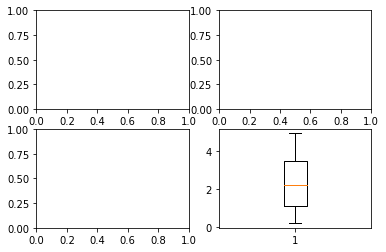

In [35]:
# box and whisker plots
fig, axes = plt.subplots(2,2)
plt.boxplot(X[1])
plt.show()